<a href="https://colab.research.google.com/github/alberthtan/neural-networks/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handwritten Digit Recognition 

For this project, we will be using the popular MNIST database. It is a collection of 70000 handwritten digits split into training and test set of 60000 and 10000 images respectively.

In [ ]:
# libraries needed
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

We will perform some transformations on our data before feeding it into the neural network pipeline. Since the input data consists of images, we will do some pre-processing to convert all the images to a format that can be understood by the neural network. We do it using torchvision.transforms.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

- transforms.ToTensor() — converts the image into numbers, that are understandable by the network. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.
- transforms.Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

The above code ensures that all our images have the same dimensions.

Now will download the data sets, shuffle them and transform each of them. We download the data sets and load them to DataLoader, which combines the data-set and a sampler and provides single- or multi-process iterators over the data-set.

In [ ]:
trainset = datasets.MNIST('/content/', download=True, train=True, transform=transform)
valset = datasets.MNIST('/content/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

# here batch size is the number of images we want to read in one go

Next, we will do some exploratory data analysis on our images and tensors. Let us check out the shape of the images and the labels.

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


The shape of images as you’ll find out is, torch.Size([64,1,28,28]), which suggests that there are 64 images in each batch and each image has a dimension of 28 x 28 pixels.

Similarly, the labels have a shape as torch.Size([64]). This is because the 64 images should have 64 labels respectively. That’s it.

Now let us view one image from the training set.

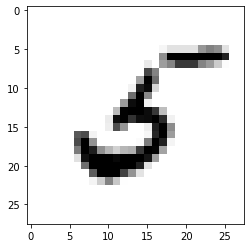

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

Next, let us view a bunch of images

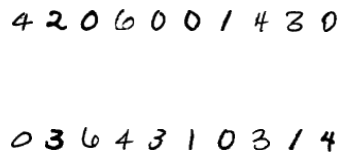

In [ ]:
figure = plt.figure()
num_of_images = 20
for index in range(1, num_of_images + 1):
    plt.subplot(2, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

This will generate a grid of images in a random order. 

Now, let us define our neural network.

We will be building the following network. This network contains an input layer (the first layer), an output layer of ten neurons (or units, the circles) and two hidden layers in between.

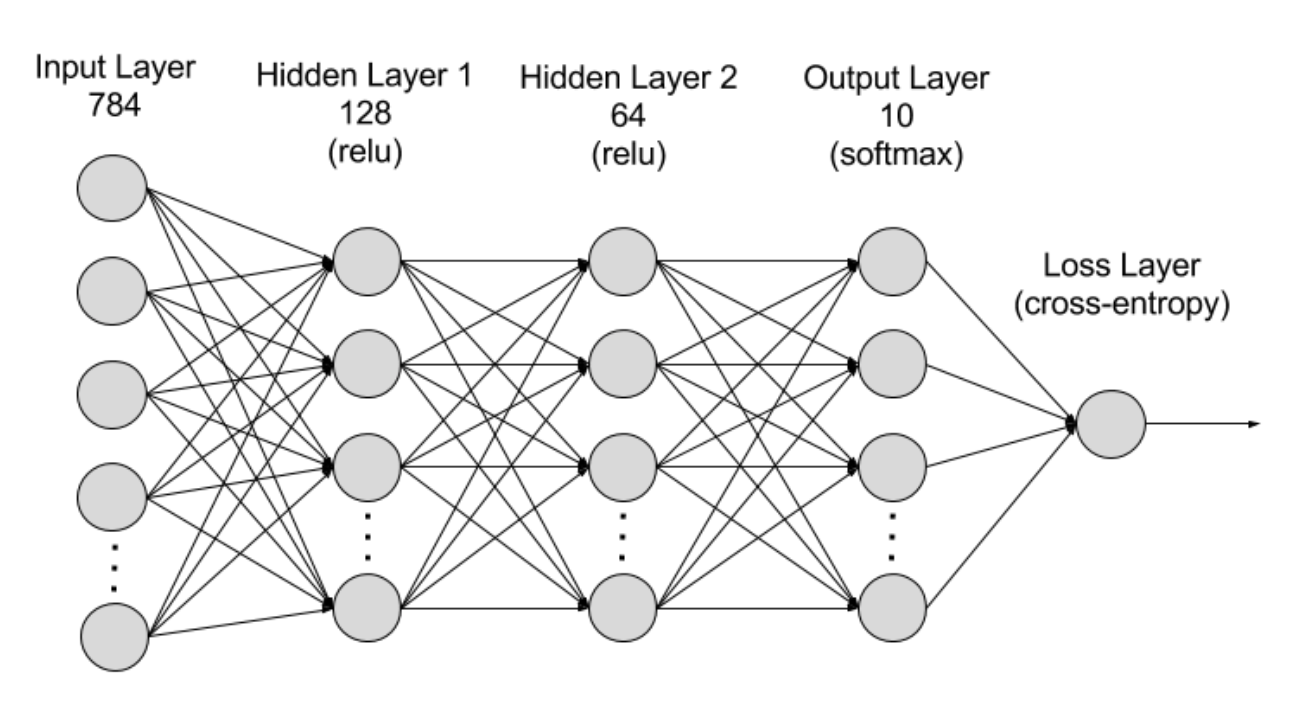

Building the above model in PyTorch:

Use nn.Sequential to start. There are three linear layers with ReLU activation ( a simple function which allows positive values to pass through, whereas negative values are modified to zero). The output layer is a linear layer with LogSoftmax activation because this is a classification problem.

We have 784 units in the first layer. It is because we flatten out each image before sending it inside the neural network. (28 x 28 = 784)

The first hidden layer size is 128. This is followed by a ReLU activation. This is passed through another hidden layer of size 64, which is followed by a ReLU activation. You have another linear layer with an output of size 10. This layer is followed by the LogSoftMax activation. 


In [ ]:

from torch import nn

model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

print(model)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


Next, we will define the negative log-likelihood loss. It is useful to train a classification problem with C classes. Together the LogSoftmax() and NLLLoss() acts as the cross-entropy loss as shown in the network architecture diagram above. Complete only the TODO parts.

In [ ]:

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

Now to train the network, the neural network iterates over the training set and updates the weights. We make use of torch.optim which is a module provided by PyTorch to optimize the model, perform gradient descent and update the weights by back-propagation. Thus in each epoch (number of times we iterate over the training set), we will be seeing a gradual decrease in training loss.

Complete the below code only in the TODO parts of the code in order to setup the training loop. Do not modify anything else in the code.

The below code may take a while to run as the data is large.

You will also be adding code to generate the tensorboard logs.

In [ ]:

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

In [ ]:

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

time0 = time()
epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass

        # Forward pass - clearing the gradients, because gradients are accumulated 
        optimizer.zero_grad()

        # predictions
        output = model(images)

        # Compute and print loss - using the loss function initialized above 
        loss = criterion(output, labels)
        print(loss.item())

        # Add the loss to the tensorboard summary writer
        writer.add_scalar('loss', loss)
        
        # This is where the model learns by backpropagating - Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        
        # optimizes its weights- Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Streaming output truncated to the last 5000 lines.
0.3353205919265747
0.4544493556022644
0.43530336022377014
0.41321828961372375
0.38539284467697144
0.4213084876537323
0.3054116666316986
0.3706548511981964
0.3799703121185303
0.1999240219593048
0.4917564392089844
0.20632387697696686
0.3582647442817688
0.3442162573337555
0.22609667479991913
0.3512277603149414
0.3119640648365021
0.32007700204849243
0.20655497908592224
0.31413912773132324
0.31072452664375305
0.16365472972393036
0.42083612084388733
0.24864839017391205
0.355677992105484
0.3322467803955078
0.2942411005496979
0.2836936116218567
0.2611226737499237
0.35903239250183105
0.42473456263542175
0.31891506910324097
0.38795119524002075
0.30772465467453003
0.24340777099132538
0.43117350339889526
0.44645676016807556
0.5342518091201782
0.2577263116836548
0.35277649760246277
0.2480773627758026
0.3072951138019562
0.18283379077911377
0.3343394100666046
0.247981458902359
0.5017716288566589
0.3597790002822876
0.27145054936408997
0.40345740318298

Run the cells below to show the image and class probabilities that were predicted

In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 4


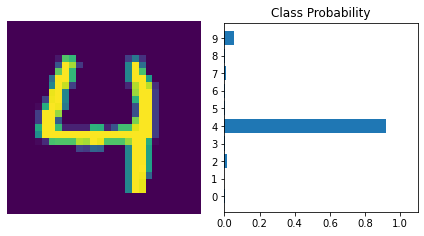

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Now we iterate through the validation set using a for loop and calculate the total number of correct predictions and then calculate the model accuracy.

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9158


Trying to achieve a better accuracy by training a model for different hyperparameters.

In [ ]:
# Increase learning rate by 5x
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.5)
# Different loss
criterion = nn.CrossEntropyLoss()

time0 = time()
epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)

        # Different loss function
        loss = criterion(output, labels)
        print(loss.item())

        writer.add_scalar('loss', loss)
        
        loss.backward()

        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Streaming output truncated to the last 5000 lines.
0.12489591538906097
0.13376858830451965
0.10049557685852051
0.14272932708263397
0.31866908073425293
0.18386021256446838
0.07454244792461395
0.18152374029159546
0.15187682211399078
0.2064465582370758
0.11862922459840775
0.1959759145975113
0.1544446051120758
0.3377152383327484
0.08447970449924469
0.11892306804656982
0.090239018201828
0.22247646749019623
0.0780392736196518
0.0941632091999054
0.5063181519508362
0.14163993299007416
0.1545983850955963
0.12241461873054504
0.14818532764911652
0.1566680669784546
0.06612934172153473
0.37228551506996155
0.05474662035703659
0.08879849314689636
0.18508243560791016
0.13866198062896729
0.22674600780010223
0.07741057127714157
0.30818432569503784
0.22249756753444672
0.18259665369987488
0.07228247821331024
0.18049925565719604
0.14366911351680756
0.06900184601545334
0.1993807554244995
0.1259237825870514
0.12746946513652802
0.25448185205459595
0.18874119222164154
0.05641280114650726
0.21039825677871704
0.

In [ ]:
# Display Accuracy

correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9653
